In [1]:
import pandas as pd
from pycaret.regression import predict_model
from pycaret.regression import load_model
import os
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df_ab = pd.read_csv('data/ccle_alpha_and_beta.csv', index_col=0)
df_ab.head()

,Alpha,1,2,9,10,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,47,48,49,50,51,52,53,54,55,56,58,59,60,70,72,81,86,87,88,89,90,91,92,93,94,97,100,101,102,103,104,105,107,108,109,111,112,113,114,115,116,117,118,119,120,123,124,125,126,127,128,130,131,132,133,134,136,140,141,142,143,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,172,173,174,175,176,177,178,181,182,183,185,186,187,189,190,191,196,197,199,202,203,204,207,208,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,228,229,230,231,238,239,240,241,242,245,246,247,248,249,250,251,258,259,262,265,266,267,269,270,271,272,273,274,275,283,284,285,286,287,288,290,291,292,293,301,302,303,304,305,306,307,308,309,310,311,312,313,314,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,341,343,344,345,347,348,350,351,353,354,355,356,357,358,359,...,100216545,100216546,100270679,100270804,100271715,100271722,100271840,100272147,100272216,100272217,100272228,100286925,100287114,100287216,100287221,100287290,100287366,100287482,100287525,100287569,100287704,100287814,100287877,100287896,100287902,100287932,100288123,100288152,100288198,100288310,100288675,100288721,100288730,100288798,100288805,100288893,100289019,100289058,100289061,100289094,100289187,100289230,100289255,100289274,100289333,100289341,100289361,100289373,100289410,100289473,100289635,100289678,100291323,100291666,100292680,100294145,100294720,100302522,100302640,100302650,100303728,100306951,100309464,100379174,100379661,100422737,100498859,100499177,100499466,100499467,100505478,100505494,100505498,100505501,100505530,100505547,100505549,100505564,100505570,100505621,100505641,100505648,100505664,100505679,100505696,100505710,100505727,100505741,100505758,100505774,100505782,100505784,100505806,100505841,100505851,100505853,100505865,100505876,100505877,100505878,100505890,100505893,100505912,100505915,100505918,100505920,100505929,100505938,100505964,100506003,100506014,100506016,100506046,100506047,100506049,100506070,100506080,100506082,100506098,100506100,100506115,100506119,100506127,100506142,100506175,100506190,100506258,100506271,100506274,100506275,100506286,100506289,100506328,100506351,100506371,100506374,100506388,100506405,100506406,100506411,100506421,100506428,100506443,100506459,100506465,100506470,100506472,100506475,100506476,100506498,100506504,100506526,100506527,100506530,100506542,100506555,100506571,100506581,100506603,100506606,100506621,100506622,100506639,100506658,100506699,100506710,100506724,100506725,100506731,100506742,100506769,100506791,100506813,100506815,100506858,100506860,100506863,100506907,100506922,100506965,100506990,100506999,100507006,100507008,100507033,100507050,100507053,100507057,100507065,100507066,100507099,100507114,100507135,100507140,100507165,100507171,100507178,100507203,100507217,100507249,100507257,100507261,100507266,100507267,100507274,100507277,100507290,100507291,100507297,100507303,100507311,100507316,100507336,100507362,100507398,100507403,100507421,100507428,100507436,100507463,100507480,100507506,100507507,100507513,100507520,100507533,100507537,100507540,100507560,100507600,100507602,100507616,100507654,100507670,100508631,100526833,100527964,100533106,100616497,100628307,100630918,100631378,100642175,100652770,100652791,100653022,100689073,100689074,100820829,Beta
22rv1,0.28000,4.42345,4.13415,10.50501,4.18032,3.82898,3.41617,8.92442,3.54774,10.48976,5.44863,3.92701,5.04642,8.07085,9.32841,9.00146,3.99681,8.21316,3.48525,5.86614,3.87076,6.62402,8.59440,8.82977,5.23729,8.37301,12.12258,6.26800,7.18563,10.69009,5.43992,10.98539,3.64014,5.94787,3.88712,10.72179,5.74635,4.21555,7.41080,5.57044,8.93424,7.66172,3.87980,4.80249,4.79694,3.65638,4.31344,13.87457,4.55692,3.84068,10.00740,10.92166,7.57167,5.23722,3.73821,6.77635,5.24043,6.73192,5.95836,4.11784,9.69896,4.85219,4.25011,7.83357,11.61899,4.96574,3.76163,3.86838,3

In [3]:
df_ab.drop(['Beta', 'Alpha'], axis=1, inplace=True)
df_ab.head()


,1,2,9,10,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,47,48,49,50,51,52,53,54,55,56,58,59,60,70,72,81,86,87,88,89,90,91,92,93,94,97,100,101,102,103,104,105,107,108,109,111,112,113,114,115,116,117,118,119,120,123,124,125,126,127,128,130,131,132,133,134,136,140,141,142,143,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,172,173,174,175,176,177,178,181,182,183,185,186,187,189,190,191,196,197,199,202,203,204,207,208,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,228,229,230,231,238,239,240,241,242,245,246,247,248,249,250,251,258,259,262,265,266,267,269,270,271,272,273,274,275,283,284,285,286,287,288,290,291,292,293,301,302,303,304,305,306,307,308,309,310,311,312,313,314,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,341,343,344,345,347,348,350,351,353,354,355,356,357,358,359,360,...,100192386,100216545,100216546,100270679,100270804,100271715,100271722,100271840,100272147,100272216,100272217,100272228,100286925,100287114,100287216,100287221,100287290,100287366,100287482,100287525,100287569,100287704,100287814,100287877,100287896,100287902,100287932,100288123,100288152,100288198,100288310,100288675,100288721,100288730,100288798,100288805,100288893,100289019,100289058,100289061,100289094,100289187,100289230,100289255,100289274,100289333,100289341,100289361,100289373,100289410,100289473,100289635,100289678,100291323,100291666,100292680,100294145,100294720,100302522,100302640,100302650,100303728,100306951,100309464,100379174,100379661,100422737,100498859,100499177,100499466,100499467,100505478,100505494,100505498,100505501,100505530,100505547,100505549,100505564,100505570,100505621,100505641,100505648,100505664,100505679,100505696,100505710,100505727,100505741,100505758,100505774,100505782,100505784,100505806,100505841,100505851,100505853,100505865,100505876,100505877,100505878,100505890,100505893,100505912,100505915,100505918,100505920,100505929,100505938,100505964,100506003,100506014,100506016,100506046,100506047,100506049,100506070,100506080,100506082,100506098,100506100,100506115,100506119,100506127,100506142,100506175,100506190,100506258,100506271,100506274,100506275,100506286,100506289,100506328,100506351,100506371,100506374,100506388,100506405,100506406,100506411,100506421,100506428,100506443,100506459,100506465,100506470,100506472,100506475,100506476,100506498,100506504,100506526,100506527,100506530,100506542,100506555,100506571,100506581,100506603,100506606,100506621,100506622,100506639,100506658,100506699,100506710,100506724,100506725,100506731,100506742,100506769,100506791,100506813,100506815,100506858,100506860,100506863,100506907,100506922,100506965,100506990,100506999,100507006,100507008,100507033,100507050,100507053,100507057,100507065,100507066,100507099,100507114,100507135,100507140,100507165,100507171,100507178,100507203,100507217,100507249,100507257,100507261,100507266,100507267,100507274,100507277,100507290,100507291,100507297,100507303,100507311,100507316,100507336,100507362,100507398,100507403,100507421,100507428,100507436,100507463,100507480,100507506,100507507,100507513,100507520,100507533,100507537,100507540,100507560,100507600,100507602,100507616,100507654,100507670,100508631,100526833,100527964,100533106,100616497,100628307,100630918,100631378,100642175,100652770,100652791,100653022,100689073,100689074,100820829
22rv1,4.42345,4.13415,10.50501,4.18032,3.82898,3.41617,8.92442,3.54774,10.48976,5.44863,3.92701,5.04642,8.07085,9.32841,9.00146,3.99681,8.21316,3.48525,5.86614,3.87076,6.62402,8.59440,8.82977,5.23729,8.37301,12.12258,6.26800,7.18563,10.69009,5.43992,10.98539,3.64014,5.94787,3.88712,10.72179,5.74635,4.21555,7.41080,5.57044,8.93424,7.66172,3.87980,4.80249,4.79694,3.65638,4.31344,13.87457,4.55692,3.84068,10.00740,10.92166,7.57167,5.23722,3.73821,6.77635,5.24043,6.73192,5.95836,4.11784,9.69896,4.85219,4.25011,7.83357,11.61899,4.96574,3.76163,3.86838,3.6914

In [4]:
new_ab_df = df_ab.loc[['te11', 'cw2', 'ncih661', 'imr32', 'ovcar8', 'kns81', 'hs766t', 'chagok1', 'oaw42', 'a172', 'gi1', 'kmrc2', 'mfe319', 'k029ax', 'gamg', 'ncih2087', 't84', 'bicr31' ,'hec1a' ,'wm88' ,'snuc4' ,'ncih2030' ,'yd38' ,'cov644' ,'colo679' ,'es2' ,'skut1' ,'vmrclcd' ,'dbtrg05mg' ,'corl105' ,'sw1573' ,'daoy' ,'hec265' ,'5637' ,'ov7' ,'dkmg' ,'ku1919' ,'jhh5' ,'te9' ,'ncih727' ,'ke39' ,'sw1271' ,'bt20' ,'ncih810' ,'22rv1' ,'a2058' ,'wm1799' ,'igrov1' ,'du145' ,'ln18']]

In [5]:
df_beta_fs = new_ab_df[['8204', '25907', '23430', '4056', '23242', '4065', '6286', '5266', '100128098', '64208', '120224', '8292', '7103', '3856', '1179', '400965', '5172', '140886', '65055', '1510', '56034', '2350', '10085', '150005', '100505893', '5217', '9341', '389932', '399959', '27164', '221391', '1290', '1734', '80852', '64288', '23767', '643616', '26999', '80831', '100506542', '9750', '6273', '2559', '2891', '131920', '50852', '1795', '10656', '81792', '728613', '162540', '55752', '2181', '9615', '1825', '54674', '257313', '57045', '9014', '135644', '286190', '4255', '7045', '56659', '778', '4013', '92092', '169834', '171483', '8521', '6335', '6678', '93107', '100506639', '24147', '26065', '161931', '6019', '92421', '4072', '389813', '116123', '387755', '30009', '10782', '6591', '148189', '3449', '53826', '3171', '2203', '56925', '91653', '27077', '166824', '23461', '10551', '1284', '285613', '93517', '5420', '100132708', '7766', '55679', '9369', '55966', '4192', '5449', '135152', '5534', '10230', '100507267', '3400', '120114', '1006', '26136', '8526', '170575', '1991', '80071', '4680', '80201', '162681', '83450', '1026', '64854', '64793', '200916', '3049', '590', '4118', '93082', '646241', '388951', '126661', '100128071', '378832', '1545', '84232', '56180', '3315', '84223', '11118', '80759', '2890', '27134', '1416', '399665', '3069', '386758', '6947', '952', '55776', '4885', '8495', '100133319', '400793', '6549', '57498', '200159', '4069', '164284', '4071', '340533', '1009', '1294', '153684', '6871', '4600', '283742', '158471', '83887', '55425', '388021', '51282', '8536', '8518', '5202', '9656', '5617', '440498', '284119', '159195', '9229', '369', '136', '8383', '135295', '9754', '100129455', '9033', '10170', '126328', '100131510', '22849', '5789', '2784', '84692', '9242', '401588', '146225', '56914', '6457', '5652', '54825', '3516', '563', '9191', '3120', '54737', '10880', '51297', '5010', '285386', '65012', '5025', '139081', '2644', '7803', '250', '6865', '11320', '1087', '59342', '163859', '9696', '2737', '100616497', '57480', '1240', '23387', '100130078', '1038', '10125', '3234', '121441', '27147', '3625', '10468', '51475', '4905', '285957', '140771', '81796', '53829', '115426', '5784', '388695', '9223', '10158', '285555', '10261', '6301', '91137', '4311', '56882', '339803', '788', '3908', '85509', '51660', '54499', '29802', '57602', '59286', '9056', '81888', '144455', '10544', '6338', '255743', '54106', '1268', '79785', '91801', '117531', '50508', '55007', '2058', '8970', '145173', '57501', '2904', '2826', '340252', '163183', '130120', '114882', '90522', '57643', '948', '80824', '91752', '22873', '23040', '133957', '286827', '3948', '30012', '85403', '122042', '54839', '27098', '25758', '22828', '1287', '1943', '23495', '283948', '4604', '23116', '100128927', '121793', '2523', '117581', '2070', '5212', '10808', '345222', '1371', '55565', '339976', '2290', '146849', '113730', '10038', '261734', '51276', '650794', '128653', '22903', '128025', '83468', '11227', '91543', '648691', '3781', '4488', '7739', '8828', '285593', '828', '333926', '27342', '79784', '84898', '8477', '119395', '5338', '50839', '6119', '93190', '57758', '2771', '3763', '5955', '283871', '5138', '408', '128488', '220388', '4779', '80835', '3714', '56650', '6005', '2018', '5350', '83897', '9514', '3880', '2529', '164', '340267', '1776', '23269', '1106', '29761', '283870', '51315', '9976', '112', '55630', '10054', '89792', '10911', '245911', '7844', '3012', '1804', '84752', '55311', '286223', '3059', '283078', '2358', '2703', '10865', '6492', '256987', '64850', '4176', '55112', '55028', '6677', '151176', '257396', '79725', '904', '2067', '7832', '339230', '56995', '6018', '9457', '2593', '285220', '6582', '59272', '84986', '256643', '56992', '137868', '80727', '80144', '5349', '79983', '971', '260436', '6155', '91646', '113220', '100506100', '672', '78997', '3191', '9099', '22920', '124975', '799', '54875', '4733', '54474', '653238', '255043', '2330', '55412', '284069', '665', '56931', '7424', '1942', '283486', '9554', '100292680', '23225', '79027', '57120', '1063', '10114', '838', '2356', '7673', '140606', '144809', '4633', '284083', '26046', '84695', '29118', '1539', '699', '3227', '2520', '56261', '10008', '54545', '337880', '8900', '29775', '1382', '195814', '10742', '100505806', '3189', '2570', '23310', '2893', '29110', '5806', '2299', '78989', '8360', '4131', '84816', '2297', '1060', '8287', '400566', '84418', '2312', '115207', '146712', '10456', '6662', '80304', '6138', '547', '79738', '169611', '10699', '686', '92170', '7325', '6256', '6439', '7041', '9688', '3339', '27300', '23389', '54497', '85352', '729', '4225', '79693', '79830', '1015', '144423', '151278', '25963', '134111', '130557', '5592', '83858', '91442', '10251', '119710', '55297', '375612', '5650', '23308', '4761', '285780', '139886', '79594', '148113', '1946', '5937', '79895', '114088', '92691', '339263', '7205', '9093', '2908', '140739', '5718', '127544', '10198', '79949', '399694', '133688', '26240', '146713', '9778', '27302', '55170', '3620', '64433', '4258', '388533', '29988', '85446', '27324', '100131017', '116362', '339874', '3831', '3669', '29124', '553103', '349136', '729522', '100506530', '114795', '54360', '996', '990', '255025', '140578', '8065', '218', '6048', '81786', '6764', '2857', '284697', '667', '2161', '57094', '4648', '5132', '26279', '125919', '1368', '388456', '2077', '9788', '646', '2886', '84866', '100507266', '222698', '387751', '51460', '79728', '9681', '54751', '51232', '414918', '80728', '286676', '55638', '91947', '11105', '162239', '643677', '90853', '146909', '130560', '100506119', '57458', '5325', '5557', '8417', '54221', '5777', '84134', '6431', '125972', '11132', '200150', '256764', '100506049', '51560', '171391', '9627', '493861', '5981', '285093', '51705', '7153', '9497', '154664', '1013', '6853', '25845', '3615', '140461', '6041', '124790', '8030', '2068', '6941', '29767', '9032', '57082', '286083', '7182', '23080', '29902', '284898', '38', '653308', '25766', '64595', '6742', '55174', '2202', '22987', '80723', '4216', '5054', '51299', '245932', '80078', '4993', '7472', '167410', '55294', '9475', '10396', '5119', '79148', '25806', '442721', '221458', '57118', '2117', '439927', '79917', '339240', '8694', '6330', '84171', '23654', '10499', '84969', '116039', '5074', '355', '11339', '9668', '57189', '100130967', '81706', '57732', '200407', '404201', '58538', '440757', '27201', '8318', '54849', '1102', '221091', '729830', '59345', '9716', '1738', '280664', '5562', '991', '25961', '776', '222962', '51655', '100270679', '8913', '732253', '152330', '283352', '149563', '55387', '27020', '10343', '100507178', '170850', '64221', '26762', '54089', '90410', '9044', '3741', '51233', '201595', '1650', '5875', '767', '5028', '9918', '339988', '22989', '219409', '57010', '57591', '10724', '92', '118788', '9054', '3198', '7626', '79018', '6530', '100291666', '10884', '23059', '222553', '84288', '339807', '10490', '93408', '80022', '80021', '913', '2567', '27285', '80045', '2690', '1062', '23677', '55214', '55055', '834', '79657', '348235', '55301', '54504', '84766', '378828', '79836', '284361', '3490', '2821', '6369', '124989', '160857', '222663', '8825', '9761', '286046', '23255', '55223', '387837', '100130776', '3084', '7840', '26297', '84900', '5705', '121355', '6660', '4188', '11074', '55286', '1493', '51471', '8409', '353274', '1842', '2706', '254863', '375484', '79888', '128178', '284561', '8349', '2859', '9425', '5298', '55038', '85009', '54535', '57136', '27106', '5646', '79993', '26167', '3077', '57619', '147906', '9509', '10308', '8715', '55801', '201158', '3960', '84914', '3116', '9709', '402055', '55800', '389058', '644246', '100653022', '4649', '1364', '9194', '118430', '8438', '252884', '79962', '493', '5909', '6319', '1643', '8125', '56999', '387103', '6729', '55671', '740', '1950', '100506731', '84063', '3172', '126731', '203076', '84660', '65985', '644815', '100505679', '89766', '11167', '10811', '54509', '126014', '51181', '283461', '90141', '54807', '8352', '23248', '65999', '152789', '6091', '11315', '113419', '134429', '129080', '4199', '5455', '375444', '4729', '65059', '6786', '59338', '63950', '1616', '644096', '208', '9990', '7049', '9578', '84519', '5106', '9322', '65983', '25903', '55619', '3635', '79413', '283450', '5352', '4117', '4354', '90324', '158376', '283383', '92935', '5155', '120892', '2170', '90134', '4250', '8842', '7163', '55765', '692159', '9757', '134829', '284186', '115752', '57405', '676', '5653', '10560', '158158', '1632', '63926', '100506606', '93624', '3817', '55248', '168391', '26011', '94160', '91120', '2905', '494470', '51027', '51760', '158586', '402', '100289341', '80254', '8359', '283869', '151556', '140807', '23657', '284346', '80726', '150197', '119587', '65080', '100294145', '84248', '10875', '158293', '8365', '28999', '28983', '221294', '1740', '57787', '7227', '150763', '51062', '5051', '7403', '3678', '644809', '9927', '5605', '3158', '64806', '79651', '7188', '285973', '10049', '50604', '9524', '51205', '132660', '219790', '57176', '57691', '84273', '83943', '3772', '25984', '55911', '222545', '100129387', '22856', '22938', '3860', '93185', '84830', '9513', '65243', '64901', '3491', '10087', '4246', '26189', '6545', '6542', '51661', '1499', '55217', '5816', '3007', '54544', '9980', '23550', '4610', '8766', '11004', '8897', '10595', '150577', '221710', '51668', '100505920', '11254', '7291', '645644', '79867', '8784', '57369', '79990', '171177', '164312', '100306951', '22864', '143279', '79443', '92483', '10979', '4708', '162494', '7106', '4435', '9481', '84216', '284422', '56135', '57575', '6278', '130106', '493869', '55731', '2768', '8975', '132884', '6275', '10826', '54934', '55090', '6340', '202', '9710', '285596', '10575', '79627', '221504', '65990', '100129196', '6646', '2295', '55258', '6832', '8418', '285766', '3797', '25818', '158584', '1983', '8507', '65988', '6670', '7494', '6414', '115201', '79667', '10557', '81853', '1644', '113763', '4330', '150147', '28964', '390940', '83656', '9960', '170394', '83479', '25769', '100506328', '283070', '113263', '116159', '306', '10580', '55830', '347730', '51702', '414', '4660', '7805', '6787', '59348', '351', '84343', '80704', '55974', '65997', '3363', '51146', '259217', '91074', '79033', '7531', '347732', '54457', '58508', '10653', '646962', '4599', '79782', '79823', '29967', '94059', '729967', '2744', '11165', '6368', '9252', '64167', '153396', '65996', '64651', '10120', '10002', '10090', '91942', '9420', '221424', '4850', '27246', '285016', '51121', '10794', '170712', '6167', '51530', '23369', '54510', '6502', '57157']]

In [6]:
display(df_beta_fs.head())
df_beta_fs.shape

,8204,25907,23430,4056,23242,4065,6286,5266,100128098,64208,120224,8292,7103,3856,1179,400965,5172,140886,65055,1510,56034,2350,10085,150005,100505893,5217,9341,389932,399959,27164,221391,1290,1734,80852,64288,23767,643616,26999,80831,100506542,9750,6273,2559,2891,131920,50852,1795,10656,81792,728613,162540,55752,2181,9615,1825,54674,257313,57045,9014,135644,286190,4255,7045,56659,778,4013,92092,169834,171483,8521,6335,6678,93107,100506639,24147,26065,161931,6019,92421,4072,389813,116123,387755,30009,10782,6591,148189,3449,53826,3171,2203,56925,91653,27077,166824,23461,10551,1284,285613,93517,5420,100132708,7766,55679,9369,55966,4192,5449,135152,5534,10230,100507267,3400,120114,1006,26136,8526,170575,1991,80071,4680,80201,162681,83450,1026,64854,64793,200916,3049,590,4118,93082,646241,388951,126661,100128071,378832,1545,84232,56180,3315,84223,11118,80759,2890,27134,1416,399665,3069,386758,6947,952,55776,4885,8495,100133319,400793,6549,57498,200159,4069,164284,4071,340533,1009,1294,153684,6871,4600,283742,158471,83887,55425,388021,51282,8536,8518,5202,9656,5617,440498,284119,159195,9229,369,136,8383,135295,9754,100129455,9033,10170,126328,100131510,22849,5789,2784,84692,9242,401588,146225,56914,6457,5652,54825,3516,563,9191,3120,54737,10880,51297,5010,285386,65012,5025,139081,2644,7803,250,6865,11320,1087,59342,163859,9696,2737,100616497,57480,1240,23387,100130078,1038,10125,3234,121441,27147,3625,10468,51475,4905,285957,140771,81796,53829,115426,5784,388695,9223,10158,...,2170,90134,4250,8842,7163,55765,692159,9757,134829,284186,115752,57405,676,5653,10560,158158,1632,63926,100506606,93624,3817,55248,168391,26011,94160,91120,2905,494470,51027,51760,158586,402,100289341,80254,8359,283869,151556,140807,23657,284346,80726,150197,119587,65080,100294145,84248,10875,158293,8365,28999,28983,221294,1740,57787,7227,150763,51062,5051,7403,3678,644809,9927,5605,3158,64806,79651,7188,285973,10049,50604,9524,51205,132660,219790,57176,57691,84273,83943,3772,25984,55911,222545,100129387,22856,22938,3860,93185,84830,9513,65243,64901,3491,10087,4246,26189,6545,6542,51661,1499,55217,5816,3007,54544,9980,23550,4610,8766,11004,8897,10595,150577,221710,51668,100505920,11254,7291,645644,79867,8784,57369,79990,171177,164312,100306951,22864,143279,79443,92483,10979,4708,162494,7106,4435,9481,84216,284422,56135,57575,6278,130106,493869,55731,2768,8975,132884,6275,10826,54934,55090,6340,202,9710,285596,10575,79627,221504,65990,100129196,6646,2295,55258,6832,8418,285766,3797,25818,158584,1983,8507,65988,6670,7494,6414,115201,79667,10557,81853,1644,113763,4330,150147,28964,390940,83656,9960,170394,83479,25769,100506328,283070,113263,116159,306,10580,55830,347730,51702,414,4660,7805,6787,59348,351,84343,80704,55974,65997,3363,51146,259217,91074,79033,7531,347732,54457,58508,10653,646962,4599,79782,79823,29967,94059,729967,2744,11165,6368,9252,64167,153396,65996,64651,10120,10002,10090,91942,9420,221424,4850,27246,285016,51121,10794,170712,6167,51530,23369,54510,6502,57157
te11,9.55243,7.33946,4.55269,3.87172,5.00522,3.15790,11.24055,5.43145,4.36148,9.95324,5.30410,4.08888,3.27700,8.27721,4.41134,3.62859,3.34049,3.18417,4.60781,4.20637,7.11814,4.86631,5.80370,3.36066,3.45885,12.87813,11.15469,4.06455,5.94807,3.66134,4.50540,4.53625,4.13642,5.31892,8.90157,6.04418,3.48647,3.53548,4.11240,3.25910,3.64878,14.13117,3.84437,3.24542,4.02722,3.45006,4.08455,4.19673,4.10913,4.43279,3.42026,6.22214,9.97337,5.29021,9.54228,4.13848,3.52886,8.27562,7.31688,3.53209,3.53741,6.21214,12.74360,3.88574,3.99722,5.18165,6.36169,3.62879,3.46897,3.93622,3.58595,3.62359,4.30240,5.44012,9.32534,8.52257,5.20524,3.21737,8.97390,12.27669,4.69548,3.57306,3.81498,4.05778,7.11086,11.14301,5.02467,3.45851,3.99963,3.62227,4.35236,4.25633,4.73909,5.97899,5.33006,4.66215,8.12835,8.35718,6.23802,4.00610,6.39413,3.28693,5.25462,4.85405,3.69966,4.60681,8.96308,3.07852,3.85907,6.07886,5.31393,3.73249,5.99243,3.74426,3.70562,7.97730,4.42784,3.72673,3.74498,5.43151,8.11754,7.03906,5.26271,4.0761

(50, 1193)

In [7]:
alpha_model = load_model('models/0.86MLKing6302022')
beta_model = load_model('models/finalBetaModel1200features')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [8]:
beta_predicted = predict_model(beta_model, data=df_beta_fs, round=0)
beta_predicted = beta_predicted['Label']
#rename label column to beta_predicted
print(type(beta_predicted))
renamed_beta = beta_predicted.rename("beta_predicted")
renamed_beta.head()

<class 'pandas.core.series.Series'>


te11      0.04064
cw2       0.00009
ncih661   0.01888
imr32     0.00002
ovcar8    0.04705
Name: beta_predicted, dtype: float64

In [9]:
alpha_predicted = predict_model(alpha_model, data=new_ab_df, round=0)
alpha_predicted = alpha_predicted['Label']
renamed_alpha = alpha_predicted.rename("alpha_predicted")
renamed_alpha.head()

te11      0.25229
cw2       0.23956
ncih661   0.06915
imr32     1.04449
ovcar8    0.04960
Name: alpha_predicted, dtype: float64

In [10]:
pd_og = pd.read_csv('data/ccle_alpha_and_beta.csv', index_col=0)
new_pd_og = pd_og.loc[['te11', 'cw2', 'ncih661', 'imr32', 'ovcar8', 'kns81', 'hs766t', 'chagok1', 'oaw42', 'a172', 'gi1', 'kmrc2', 'mfe319', 'k029ax', 'gamg', 'ncih2087', 't84', 'bicr31' ,'hec1a' ,'wm88' ,'snuc4' ,'ncih2030' ,'yd38' ,'cov644' ,'colo679' ,'es2' ,'skut1' ,'vmrclcd' ,'dbtrg05mg' ,'corl105' ,'sw1573' ,'daoy' ,'hec265' ,'5637' ,'ov7' ,'dkmg' ,'ku1919' ,'jhh5' ,'te9' ,'ncih727' ,'ke39' ,'sw1271' ,'bt20' ,'ncih810' ,'22rv1' ,'a2058' ,'wm1799' ,'igrov1' ,'du145' ,'ln18']]
new_pd_og.head()

,Alpha,1,2,9,10,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,47,48,49,50,51,52,53,54,55,56,58,59,60,70,72,81,86,87,88,89,90,91,92,93,94,97,100,101,102,103,104,105,107,108,109,111,112,113,114,115,116,117,118,119,120,123,124,125,126,127,128,130,131,132,133,134,136,140,141,142,143,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,172,173,174,175,176,177,178,181,182,183,185,186,187,189,190,191,196,197,199,202,203,204,207,208,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,228,229,230,231,238,239,240,241,242,245,246,247,248,249,250,251,258,259,262,265,266,267,269,270,271,272,273,274,275,283,284,285,286,287,288,290,291,292,293,301,302,303,304,305,306,307,308,309,310,311,312,313,314,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,341,343,344,345,347,348,350,351,353,354,355,356,357,358,359,...,100216545,100216546,100270679,100270804,100271715,100271722,100271840,100272147,100272216,100272217,100272228,100286925,100287114,100287216,100287221,100287290,100287366,100287482,100287525,100287569,100287704,100287814,100287877,100287896,100287902,100287932,100288123,100288152,100288198,100288310,100288675,100288721,100288730,100288798,100288805,100288893,100289019,100289058,100289061,100289094,100289187,100289230,100289255,100289274,100289333,100289341,100289361,100289373,100289410,100289473,100289635,100289678,100291323,100291666,100292680,100294145,100294720,100302522,100302640,100302650,100303728,100306951,100309464,100379174,100379661,100422737,100498859,100499177,100499466,100499467,100505478,100505494,100505498,100505501,100505530,100505547,100505549,100505564,100505570,100505621,100505641,100505648,100505664,100505679,100505696,100505710,100505727,100505741,100505758,100505774,100505782,100505784,100505806,100505841,100505851,100505853,100505865,100505876,100505877,100505878,100505890,100505893,100505912,100505915,100505918,100505920,100505929,100505938,100505964,100506003,100506014,100506016,100506046,100506047,100506049,100506070,100506080,100506082,100506098,100506100,100506115,100506119,100506127,100506142,100506175,100506190,100506258,100506271,100506274,100506275,100506286,100506289,100506328,100506351,100506371,100506374,100506388,100506405,100506406,100506411,100506421,100506428,100506443,100506459,100506465,100506470,100506472,100506475,100506476,100506498,100506504,100506526,100506527,100506530,100506542,100506555,100506571,100506581,100506603,100506606,100506621,100506622,100506639,100506658,100506699,100506710,100506724,100506725,100506731,100506742,100506769,100506791,100506813,100506815,100506858,100506860,100506863,100506907,100506922,100506965,100506990,100506999,100507006,100507008,100507033,100507050,100507053,100507057,100507065,100507066,100507099,100507114,100507135,100507140,100507165,100507171,100507178,100507203,100507217,100507249,100507257,100507261,100507266,100507267,100507274,100507277,100507290,100507291,100507297,100507303,100507311,100507316,100507336,100507362,100507398,100507403,100507421,100507428,100507436,100507463,100507480,100507506,100507507,100507513,100507520,100507533,100507537,100507540,100507560,100507600,100507602,100507616,100507654,100507670,100508631,100526833,100527964,100533106,100616497,100628307,100630918,100631378,100642175,100652770,100652791,100653022,100689073,100689074,100820829,Beta
te11,0.15330,4.07909,3.66632,8.46303,4.66470,3.89238,6.27740,8.69760,3.64646,10.12816,6.38352,5.99146,4.44565,4.40743,9.45170,10.11927,3.95764,8.40749,3.30003,6.23572,4.22083,6.80830,7.77146,7.99710,4.39793,3.70471,10.79359,5.59087,4.42965,9.62740,5.15962,9.73203,4.00605,5.20149,4.03514,8.91490,5.58031,4.27097,7.13723,5.40094,8.64658,7.72855,4.36738,5.01942,4.02663,3.93893,4.33712,14.15131,5.10573,3.96180,10.16094,10.95700,8.95369,4.21009,4.07473,9.38450,5.29168,6.93363,5.66669,4.40876,9.69072,7.87842,5.56275,9.16624,11.25689,4.65396,3.68457,3.98824,3.898

In [11]:
pd_og = new_pd_og[['Alpha', 'Beta']]
pd_og.head()

,Alpha,Beta
te11,0.15330,0.04226
cw2,0.28210,0.00000
ncih661,0.02230,0.01867
imr32,1.04700,0.00000
ovcar8,0.11290,0.04771


In [12]:
all_df = pd.concat([pd_og, renamed_alpha, renamed_beta], axis=1)
all_df.head()
all_df.to_csv('data/testing_sf_predictions.csv')
cell_line_list = pd_og.index.tolist()
print(cell_line_list)

['te11', 'cw2', 'ncih661', 'imr32', 'ovcar8', 'kns81', 'hs766t', 'chagok1', 'oaw42', 'a172', 'gi1', 'kmrc2', 'mfe319', 'k029ax', 'gamg', 'ncih2087', 't84', 'bicr31', 'hec1a', 'wm88', 'snuc4', 'ncih2030', 'yd38', 'cov644', 'colo679', 'es2', 'skut1', 'vmrclcd', 'dbtrg05mg', 'corl105', 'sw1573', 'daoy', 'hec265', '5637', 'ov7', 'dkmg', 'ku1919', 'jhh5', 'te9', 'ncih727', 'ke39', 'sw1271', 'bt20', 'ncih810', '22rv1', 'a2058', 'wm1799', 'igrov1', 'du145', 'ln18']


Slope: 0.9865271166652952
Intercept: 0.006816615375192042
R-Squared: 0.6363817940217453
P-Value: 4.0537726590404854e-12
Standard Error: 0.10763471001401026


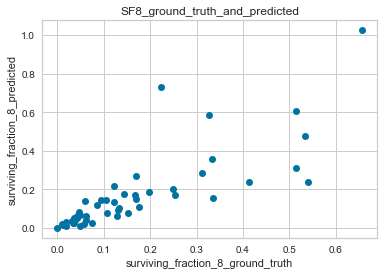

In [20]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
gta_arr = []
gtb_arr = []
pred_alpha_arr = []
pred_beta_arr = []
SFD_ground_truth_arr = []
SFD_predicted_arr = []

for row in all_df.iterrows():
    ground_truth_alpha = row[1][0]
    ground_truth_beta = row[1][1]
    predicted_alpha = row[1][2]
    predicted_beta = row[1][3]

    D = 8

    # print(D)
    #SFD = EXP(-a*D-b*D^2)
    SFD_ground_truth = np.exp(-ground_truth_alpha*D-ground_truth_beta*D**2)
    SFD_predicted = np.exp(-predicted_alpha*D-predicted_beta*D**2)



    # print('ground truth alpha: ' + str(ground_truth_alpha))
    # print('ground truth beta: ' + str(ground_truth_beta))
    # print('predicted alpha: ' + str(predicted_alpha))
    # print('predicted beta: ' + str(predicted_beta))
    # print('SFD_ground_truth: ' + str(SFD_ground_truth))
    # print('SFD_predicted: ' + str(SFD_predicted))
    # print('\n')

    gta_arr.append(ground_truth_alpha)
    gtb_arr.append(ground_truth_beta)
    pred_alpha_arr.append(predicted_alpha)
    pred_beta_arr.append(predicted_beta)
    SFD_ground_truth_arr.append(SFD_ground_truth)
    SFD_predicted_arr.append(SFD_predicted)


#create new dataframe and write grunt truth sf and predicted sf to it
new_df = pd.DataFrame(columns=['surviving_fraction', 'ground_truth_alpha', 'ground_truth_beta', 'predicted_alpha', 'predicted_beta', 'SFD_ground_truth', 'SFD_predicted'])
new_df['ground_truth_alpha'] = gta_arr
new_df['ground_truth_beta'] = gtb_arr
new_df['predicted_alpha'] = pred_alpha_arr
new_df['predicted_beta'] = pred_beta_arr
new_df['SFD_ground_truth'] = SFD_ground_truth_arr
new_df['SFD_predicted'] = SFD_predicted_arr
new_df.insert(0, 'cell_line', cell_line_list)
new_df.loc[:, 'surviving_fraction'] = D
new_df.to_csv('data/SFD_ground_truth_and_predicted_{}.csv'.format(D), index=None)

plt.plot(SFD_ground_truth_arr, SFD_predicted_arr, 'o')
slope, intercept, r_value, p_value, std_err = stats.linregress(SFD_ground_truth_arr, SFD_predicted_arr)

print("Slope:", slope)
print("Intercept:", intercept)
print("R-Squared:", r_value*r_value)
print("P-Value:", p_value)
print("Standard Error:", std_err)
plt.xlabel('surviving_fraction_{}_ground_truth'.format(D))
plt.ylabel('surviving_fraction_{}_predicted'.format(D))
plt.title('SF{}_ground_truth_and_predicted'.format(D))
plt.show()